# Evaluation of Q-Learning

In [13]:
! pip show gym

Name: gym
Version: 0.25.0
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: C:\Users\tq121\Desktop\cartpole_colab\rl_env\Lib\site-packages
Requires: cloudpickle, gym_notices, numpy
Required-by: 


In [1]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import numpy as np
from collections import deque
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

if not hasattr(np, "bool8"):
    np.bool8 = np.bool_


# Load the trained Q-Learning agent's Q-Table

In [2]:
Q = np.load("q_learning_Q_table.npy")
bins = np.load("q_learning_bins.npy", allow_pickle=True)

# Define the helper functions(same as the Q-Learning training file)

In [3]:
def create_bins(num_bins, lower_bounds, upper_bounds):
    bins = []
    for i in range(len(num_bins)):
        # Create num_bins[i]-1 cut points between lower and upper bound
        bins.append(np.linspace(lower_bounds[i], upper_bounds[i], num_bins[i] - 1))
    return bins

def discretize_state(state, bins):
    # Map each continuous state value into its corresponding bin index
    return tuple(np.digitize(s, b) for s, b in zip(state, bins))

# Run the evaluation and record the video:

(Warning the block below going to take 3-5 min to execute)

In [21]:
import gym
import numpy as np
from gym.wrappers import RecordVideo

# Ensure that eval_episodes is defined before using it in the lambda function
eval_episodes = 100

# Create a new evaluation environment with video recording enabled.
video_folder = "evaluation_v"
env_evaluation = gym.make("CartPole-v1", render_mode="rgb_array")
env_evaluation = RecordVideo(
    env_evaluation,
    video_folder=video_folder,
    episode_trigger=lambda ep:ep % 10 == 0,
    name_prefix="evaluation"
)

result = env_evaluation.reset()
observation, info = result[:2]


# Assume discretize_state, bins, and Q are defined elsewhere in your notebook
evaluation_rewards = []
max_steps = 500

for ep in range(1, eval_episodes + 1):
    state = env_evaluation.reset()
    state_disc = discretize_state(state, bins)
    cumulative_reward = 0
    done = False

    for step in range(max_steps):
        # Pure exploitation: select the best action from Q-table (Pure Greedy)
        action = np.argmax(Q[state_disc])
        next_state, reward, done, info = env_evaluation.step(action)
        cumulative_reward += reward
        state_disc = discretize_state(next_state, bins)
        
        # Explicitly render the frame so it gets recorded
        env_evaluation.render()
        
        if done:
            break

    evaluation_rewards.append(cumulative_reward)
    print(f"Evaluation Episode {ep}: Reward = {cumulative_reward}")

env_evaluation.close()

avg_reward = np.mean(evaluation_rewards)
print(f"Average Reward over {eval_episodes} evaluation episodes: {avg_reward:.2f}")


Evaluation Episode 1: Reward = 500.0
Evaluation Episode 2: Reward = 500.0
Evaluation Episode 3: Reward = 500.0
Evaluation Episode 4: Reward = 500.0
Evaluation Episode 5: Reward = 500.0
Evaluation Episode 6: Reward = 500.0
Evaluation Episode 7: Reward = 500.0
Evaluation Episode 8: Reward = 500.0
Evaluation Episode 9: Reward = 500.0
Evaluation Episode 10: Reward = 500.0
Evaluation Episode 11: Reward = 500.0
Evaluation Episode 12: Reward = 500.0
Evaluation Episode 13: Reward = 500.0
Evaluation Episode 14: Reward = 500.0
Evaluation Episode 15: Reward = 500.0
Evaluation Episode 16: Reward = 500.0
Evaluation Episode 17: Reward = 500.0
Evaluation Episode 18: Reward = 500.0
Evaluation Episode 19: Reward = 500.0
Evaluation Episode 20: Reward = 500.0
Evaluation Episode 21: Reward = 500.0
Evaluation Episode 22: Reward = 500.0
Evaluation Episode 23: Reward = 500.0
Evaluation Episode 24: Reward = 500.0
Evaluation Episode 25: Reward = 500.0
Evaluation Episode 26: Reward = 500.0
Evaluation Episode 27

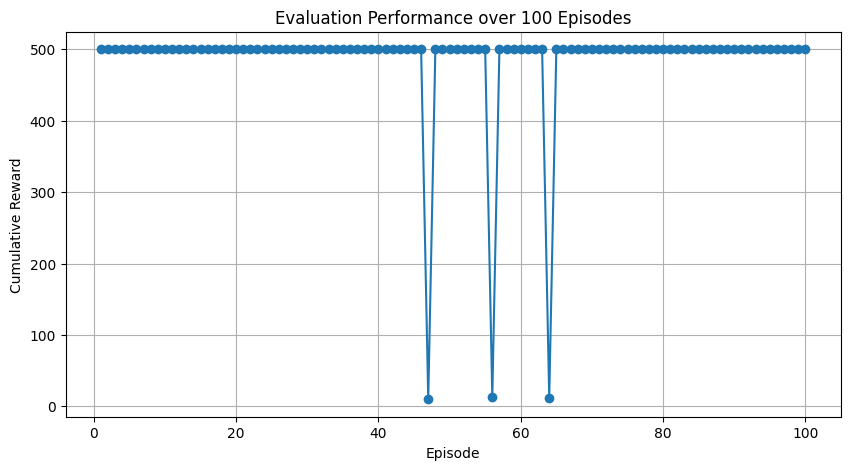

Average Reward over 100 evaluation episodes: 485.35


In [22]:

plt.figure(figsize=(10, 5))
plt.plot(range(1, eval_episodes + 1), evaluation_rewards, marker='o', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Evaluation Performance over 100 Episodes")
plt.grid(True)
plt.show()

# Also print the average reward
avg_reward = np.mean(evaluation_rewards)
print(f"Average Reward over {eval_episodes} evaluation episodes: {avg_reward:.2f}")


# Evaluation of Video 

In [24]:
from IPython.display import Video
Video("./evaluation_v/evaluation-episode-90.mp4", embed=True)
